In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
case_df = pd.read_csv('Traffy_Cases_from_2022-05-22_to_2024-12-11.csv')

In [4]:
log_df = pd.read_csv('Log_from_2022-05-22_to_2024-12-11.csv')

In [5]:
display(case_df.shape, log_df.shape)

(772938, 16)

(2035022, 3)

In [8]:
display(case_df.head())

,ticket_id,type,organization_action,comment,coords,photo,photo_after,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count
0,2024-6UUBZ2,เสียง,"เขตบางพลัด, กรุงเทพมหานคร",เพื่อนบ้านเปิดเพลงเสียงดังรบกวนผ่านเครื่องขยาย...,"100.49996,13.79136",https://storage.googleapis.com/traffy_public_b...,NaN,155 ซอย จรัญสนิทวงศ์ 79 แขวงบางพลัด เขตบางพลัด...,บางพลัด,บางพลัด,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:22,0.0
1,2024-CYP76V,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",เรียนท่านผู้ว่าก.ท.ม\nถึงก่อนปากซอยจันทร์18/7ใ...,"100.5263,13.70647",https://storage.googleapis.com/traffy_public_b...,NaN,308 ถ. จันทน์ แขวงทุ่งวัดดอน เขตสาทร กรุงเทพมห...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:14,0.0
2,2024-8U78XH,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",จัดงานตลาดนัด จัดระเบียบได้ดีให้รถมอเตอร์ไซค์เ...,"100.52758,13.70599",https://storage.googleapis.com/traffy_public_b...,NaN,1928/3 ซอย จันทน์ 23/2 แขวงทุ่งวัดดอน เขตสาทร ...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:09:51,0.0
3,RXTPAP,ฝุ่นควัน&กลิ่น&PM2.5,"เขตบางบอน, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555",ปัญหา: บริเวณหน้าบ้านเลขที่ดังกล่าว พบผู้อาศัย...,"100.44078,13.68686",https://storage.googleapis.com/traffy_public_b...,NaN,10/101 ซอย เอกชัย 46 แขวงคลองบางพราน เขตบางบอน...,คลองบางพราน,บางบอน,กรุงเทพมหานคร,forward,NaN,0.0,2024-12-11 20:09:11,0.0
4,2024-78EH2R,อื่นๆ,"เขตราชเทวี, กรุงเทพมหานคร",จอด,"100.53401,13.75657",https://storage.googleapis.com/traffy_public_b...,NaN,BTS Phaya Thai Phaya Thai Road Thanon Phaya Th...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:08:41,0.0


In [7]:
display(log_df.head())

,ticket_id,state,timestamp
0,2024-6UUBZ2,reported,2024-12-11 20:14:18
1,2024-CYP76V,reported,2024-12-11 20:14:08
2,2024-8U78XH,reported,2024-12-11 20:09:46
3,RXTPAP,reported,2024-12-11 20:09:08
4,2024-78EH2R,reported,2024-12-11 20:08:36


In [9]:
display(case_df['ticket_id'].nunique())

772938

In [10]:
display(log_df['ticket_id'].nunique())

772934

In [79]:
def clean_state(x):
    if x in ['forward', 'inprogress', 'finish', 'irrelevant', 'follow']:
        return x
    else:
        return None
    
case_df['state'] = case_df['state'].apply(clean_state)

In [80]:
case_df['state'].value_counts()

state
finish        616269
inprogress     68894
forward        53609
follow         18445
irrelevant     14991
Name: count, dtype: int64

In [81]:
case_df.dropna(subset=['state'], inplace=True)

In [82]:
case_df['state'].unique()

array(['forward', 'inprogress', 'finish', 'irrelevant', 'follow'],
      dtype=object)

start = เริ่มแจ้งเรื่อง
forward = ส่งต่อให้หน่วยงานอื่น
inprogress = ดำเนินการอยู่
follow = ติดตามสถานะ
irrelevant = ไม่เกี่ยวข้องกับหน่วยงาน
finish = เสร็จแล้ว

In [83]:
case_df['ticket_id'].value_counts()

ticket_id
RXTPAP         1
2023-BYTKRR    1
2023-EFANZD    1
2023-KQPWBQ    1
2023-9EVHA9    1
              ..
2024-XFZE3W    1
2024-M9QD7R    1
2024-BVRDAP    1
2024-C2C9GY    1
2023-KFWRCG    1
Name: count, Length: 772208, dtype: int64

In [88]:
temp_log = log_df['ticket_id'].value_counts().reset_index()

In [91]:
new_log = pd.merge(left = log_df, right = temp_log, on='ticket_id', how='left')

In [92]:
def clear_log(x):
    if x > 1:
        return x
    else:
        return None
new_log['count'] = new_log['count'].apply(clear_log)

In [93]:
new_log.shape

(2035022, 4)

In [94]:
new_log.dropna(subset=['count'],inplace=True)

In [95]:
new_log.shape

(1983060, 4)

In [96]:
new_log

,ticket_id,state,timestamp,count
7,N7Y6K3,reported,2024-12-11 20:05:47,2.0
8,N7Y6K3,inprogress,2024-12-11 20:11:47,2.0
10,2024-GHL7BY,reported,2024-12-11 20:01:40,2.0
11,2024-GHL7BY,inprogress,2024-12-11 20:05:40,2.0
44,D8XG3M,reported,2024-12-11 19:17:27,2.0
...,...,...,...,...
2035016,2022-AZ7TPX,reported,2022-05-22 20:00:17,2.0
2035017,2022-AZ7TPX,inprogress,2024-03-06 09:20:17,2.0
2035018,2022-6E7ANR,reported,2022-05-22 19:42:18,3.0
2035019,2022-6E7ANR,inprogress,2024-03-05 19:18:18,3.0


In [101]:
new_log.to_csv('new_log.csv')

In [97]:
new_log['state'].value_counts()

state
reported      720972
inprogress    637462
finish        624626
Name: count, dtype: int64

In [98]:
log_df['state'].value_counts()

state
reported      772934
inprogress    637462
finish        624626
Name: count, dtype: int64

In [99]:
new_log['state'] == 'reported'

7           True
8          False
10          True
11         False
44          True
           ...  
2035016     True
2035017    False
2035018     True
2035019    False
2035020    False
Name: state, Length: 1983060, dtype: bool

In [102]:
new_log['ticket_id'].value_counts()

ticket_id
2022-6E7ANR    3
2023-EQNH7Q    3
2023-NX2EFR    3
2023-HU6XA3    3
2023-GPZ7GE    3
              ..
2ULRPT         2
2023-ELM7BR    2
2023-ECW73B    2
2023-ALQ6GX    2
DZNG6B         2
Name: count, Length: 720972, dtype: int64

In [105]:
new_log.shape

(1983060, 4)

In [104]:
(new_log['count'] == 3).sum()

np.int64(1623348)

In [106]:
(new_log['count'] == 2).sum()

np.int64(359712)

In [ ]:
new_log2 = new_log.copy()

In [110]:
def clear_inprogress(x):
    if x == 'inprogress':
        return None
    else:
        return x


In [111]:
new_log2['state'] = new_log2['state'].apply(clear_inprogress)

In [112]:
new_log2.dropna(subset=['state'],inplace=True)

In [113]:
new_log2['state'].value_counts()

state
reported    720972
finish      624626
Name: count, dtype: int64

In [114]:
temp_log2 = new_log2['ticket_id'].value_counts().reset_index()

In [115]:
temp_log2

,ticket_id,count
0,2022-6E7ANR,2
1,2023-GKGHKW,2
2,HJ88A8,2
3,2023-CV6W6Q,2
4,2023-9UHECR,2
...,...,...
720967,NXVRN2,1
720968,DAVHPP,1
720969,2023-CL2TFZ,1
720970,MGJLK4,1


In [116]:
new_log3 = pd.merge(left = new_log2, right = temp_log2, on='ticket_id', how='left')

In [117]:
new_log3

,ticket_id,state,timestamp,count_x,count_y
0,N7Y6K3,reported,2024-12-11 20:05:47,2.0,1
1,2024-GHL7BY,reported,2024-12-11 20:01:40,2.0,1
2,D8XG3M,reported,2024-12-11 19:17:27,2.0,1
3,2024-ANZFC6,reported,2024-12-11 19:09:27,2.0,2
4,2024-ANZFC6,finish,2024-12-11 19:39:27,2.0,2
...,...,...,...,...,...
1345593,2022-K3TZH9,finish,2024-03-06 13:22:22,2.0,2
1345594,2022-EZ6KZT,reported,2022-05-22 21:14:51,2.0,1
1345595,2022-AZ7TPX,reported,2022-05-22 20:00:17,2.0,1
1345596,2022-6E7ANR,reported,2022-05-22 19:42:18,3.0,2


In [120]:
thelog = new_log3[new_log3['count_y'] == 2]

In [121]:
thelog['state'].value_counts()

state
reported    624626
finish      624626
Name: count, dtype: int64

In [122]:
thelog

,ticket_id,state,timestamp,count_x,count_y
3,2024-ANZFC6,reported,2024-12-11 19:09:27,2.0,2
4,2024-ANZFC6,finish,2024-12-11 19:39:27,2.0,2
25,2024-ZCBDC7,reported,2024-12-11 16:36:10,2.0,2
26,2024-ZCBDC7,finish,2024-12-11 18:58:10,2.0,2
43,2024-LMV2YC,reported,2024-12-11 15:52:44,2.0,2
...,...,...,...,...,...
1345590,2022-B2YD64,finish,2024-10-31 12:41:58,3.0,2
1345592,2022-K3TZH9,reported,2022-05-22 22:04:22,2.0,2
1345593,2022-K3TZH9,finish,2024-03-06 13:22:22,2.0,2
1345596,2022-6E7ANR,reported,2022-05-22 19:42:18,3.0,2


In [128]:
thelog.drop(columns=['count_x', 'count_y'], inplace=True)

/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_72526/3234916838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thelog.drop(columns=['count_x', 'count_y'], inplace=True)


In [129]:
thelog1 = thelog[thelog['state'] == 'reported']

In [130]:
thelog2 = thelog[thelog['state'] == 'finish']

In [131]:
loglog = pd.merge(left = thelog1, right = thelog2, on='ticket_id')

In [132]:
loglog

,ticket_id,state_x,timestamp_x,state_y,timestamp_y
0,2024-ANZFC6,reported,2024-12-11 19:09:27,finish,2024-12-11 19:39:27
1,2024-ZCBDC7,reported,2024-12-11 16:36:10,finish,2024-12-11 18:58:10
2,2024-LMV2YC,reported,2024-12-11 15:52:44,finish,2024-12-11 16:11:44
3,MPA9A3,reported,2024-12-11 15:50:52,finish,2024-12-11 16:16:52
4,2024-H4HK7T,reported,2024-12-11 15:16:16,finish,2024-12-11 19:16:16
...,...,...,...,...,...
624621,2022-KDNQQH,reported,2022-05-23 08:07:00,finish,2024-04-10 13:54:00
624622,2022-AM8HW9,reported,2022-05-23 00:47:23,finish,2022-05-23 15:42:23
624623,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58
624624,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22


In [ ]:
loglog['time-diff'] = pd.to_datetime(loglog['timestamp_y']) -  pd.to_datetime(loglog['timestamp_x'])

In [134]:
loglog

,ticket_id,state_x,timestamp_x,state_y,timestamp_y,time-diff
0,2024-ANZFC6,reported,2024-12-11 19:09:27,finish,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,reported,2024-12-11 16:36:10,finish,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,reported,2024-12-11 15:52:44,finish,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,reported,2024-12-11 15:50:52,finish,2024-12-11 16:16:52,0 days 00:26:00
4,2024-H4HK7T,reported,2024-12-11 15:16:16,finish,2024-12-11 19:16:16,0 days 04:00:00
...,...,...,...,...,...,...
624621,2022-KDNQQH,reported,2022-05-23 08:07:00,finish,2024-04-10 13:54:00,688 days 05:47:00
624622,2022-AM8HW9,reported,2022-05-23 00:47:23,finish,2022-05-23 15:42:23,0 days 14:55:00
624623,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00
624624,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00


In [136]:
case_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772208 entries, 3 to 772937
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ticket_id            772208 non-null  object 
 1   type                 772208 non-null  object 
 2   organization_action  772208 non-null  object 
 3   comment              772208 non-null  object 
 4   coords               772208 non-null  object 
 5   photo                772111 non-null  object 
 6   photo_after          614353 non-null  object 
 7   address              772208 non-null  object 
 8   subdistrict          771768 non-null  object 
 9   district             771766 non-null  object 
 10  province             772139 non-null  object 
 11  state                772208 non-null  object 
 12  star                 263851 non-null  float64
 13  count_reopen         772208 non-null  float64
 14  last_activity        772206 non-null  object 
 15  view_count           7

In [139]:
selected_case = case_df[['ticket_id', 'type', 'organization_action', 'coords']]
selected_case

,ticket_id,type,organization_action,coords
3,RXTPAP,ฝุ่นควัน&กลิ่น&PM2.5,"เขตบางบอน, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555","100.44078,13.68686"
6,L9LYRJ,ผิดกฎจราจร,"เขตบางบอน, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555","100.44078,13.68686"
7,N7Y6K3,ผิดกฎจราจร,"เขตราษฎร์บูรณะ, กรุงเทพมหานคร, ร้องทุกข์ กทม. ...","100.4926,13.67082"
9,2024-GHL7BY,ความสะอาด,"เขตจอมทอง, ฝ่ายรักษาความสะอาดฯ เขตจอมทอง, กรุง...","100.48265,13.6877"
10,GJK6TX,สัตว์,"เขตประเวศ, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555","100.65279,13.71911"
...,...,...,...,...
772933,2022-EZ6KZT,อื่นๆ,"เขตบางคอแหลม, เพื่อนชัชชาติ, กรุงเทพมหานคร","100.53009,13.70223"
772934,2022-AZ7TPX,"อื่นๆ,ทางเท้า","สำนักการโยธา กทม., ฝ่ายโยธา เขตบางแค, ศูนย์ก่อ...","100.41362,13.69212"
772935,2022-6E7ANR,อื่นๆ,"เขตราษฎร์บูรณะ, เพื่อนชัชชาติ, กรุงเทพมหานคร","100.49442,13.67398"
772936,2022-MK4QRK,อื่นๆ,"เขตบางคอแหลม, กรุงเทพมหานคร","100.50721,13.71441"


In [141]:
the_df = pd.merge(left=loglog, right=selected_case, on=['ticket_id'], how='left')

In [142]:
the_df

,ticket_id,state_x,timestamp_x,state_y,timestamp_y,time-diff,type,organization_action,coords
0,2024-ANZFC6,reported,2024-12-11 19:09:27,finish,2024-12-11 19:39:27,0 days 00:30:00,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.57357,13.72769"
1,2024-ZCBDC7,reported,2024-12-11 16:36:10,finish,2024-12-11 18:58:10,0 days 02:22:00,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...","100.5059,13.74345"
2,2024-LMV2YC,reported,2024-12-11 15:52:44,finish,2024-12-11 16:11:44,0 days 00:19:00,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.56348,13.73007"
3,MPA9A3,reported,2024-12-11 15:50:52,finish,2024-12-11 16:16:52,0 days 00:26:00,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...","100.49133,13.74001"
4,2024-H4HK7T,reported,2024-12-11 15:16:16,finish,2024-12-11 19:16:16,0 days 04:00:00,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร","100.56074,13.8144"
...,...,...,...,...,...,...,...,...,...
624621,2022-KDNQQH,reported,2022-05-23 08:07:00,finish,2024-04-10 13:54:00,688 days 05:47:00,"สัตว์,อื่นๆ","สำนักงานสัตวแพทย์สาธารณสุข สำนักอนามัย กทม., ฝ...","100.59547,13.92801"
624622,2022-AM8HW9,reported,2022-05-23 00:47:23,finish,2022-05-23 15:42:23,0 days 14:55:00,"น้ำท่วม,อุทกภัย","เพื่อนชัชชาติ, เขตบางเขน, กรมป้องกันและบรรเทาส...","100.6138,13.86314"
624623,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00,"อื่นๆ,เสียง","ฝ่ายโยธา เขตราชเทวี, เขตราชเทวี, เพื่อนชัชชาติ...","100.53477,13.75158"
624624,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00,"ขยะ,ความสะอาด","เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...","100.42759,13.7122"


In [145]:
the_df.type.value_counts()
def makelist(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split(',')
    else: return np.nan

the_df.type = the_df.type.apply(makelist)
the_df = the_df.explode('type')
the_df.type.value_counts()


type
อื่นๆ                              202644
ผิดกฎจราจร                         102153
ทางเท้า                            100402
ความปลอดภัย                         70986
ถนน                                 59515
                                    ...  
ด้านบริการ -> ไฟดับ                     1
อาคาร/อุปกรณ์ชำรุด                      1
ห้องน้ำคนพิการ                          1
Public Event ขออนุญาตจัดกิจกรรม         1
ไฟฟ้า/แสงสว่าง                          1
Name: count, Length: 70, dtype: int64

In [190]:
se = the_df.groupby('type')['time-diff'].mean().sort_values()

In [191]:
se = se.reset_index()

In [193]:
se['time_diff'] = se['time-diff']

In [194]:
the_df2 = pd.merge(left=the_df, right=se, on='type')

In [195]:
the_df2

,ticket_id,state_x,timestamp_x,state_y,timestamp_y,time-diff_x,type,organization_action,coords,time-diff_y,time_diff
0,2024-ANZFC6,reported,2024-12-11 19:09:27,finish,2024-12-11 19:39:27,0 days 00:30:00,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.57357,13.72769",31 days 02:55:39.810218978,31 days 02:55:39.810218978
1,2024-ZCBDC7,reported,2024-12-11 16:36:10,finish,2024-12-11 18:58:10,0 days 02:22:00,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...","100.5059,13.74345",15 days 16:57:41.826168443,15 days 16:57:41.826168443
2,2024-LMV2YC,reported,2024-12-11 15:52:44,finish,2024-12-11 16:11:44,0 days 00:19:00,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.56348,13.73007",64 days 06:20:47.778919855,64 days 06:20:47.778919855
3,MPA9A3,reported,2024-12-11 15:50:52,finish,2024-12-11 16:16:52,0 days 00:26:00,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...","100.49133,13.74001",31 days 20:42:50.295489891,31 days 20:42:50.295489891
4,2024-H4HK7T,reported,2024-12-11 15:16:16,finish,2024-12-11 19:16:16,0 days 04:00:00,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร","100.56074,13.8144",10 days 06:43:01.504651476,10 days 06:43:01.504651476
...,...,...,...,...,...,...,...,...,...,...,...
896746,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00,อื่นๆ,"ฝ่ายโยธา เขตราชเทวี, เขตราชเทวี, เพื่อนชัชชาติ...","100.53477,13.75158",70 days 12:19:42.618286255,70 days 12:19:42.618286255
896747,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00,เสียง,"ฝ่ายโยธา เขตราชเทวี, เขตราชเทวี, เพื่อนชัชชาติ...","100.53477,13.75158",31 days 20:42:50.295489891,31 days 20:42:50.295489891
896748,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00,ขยะ,"เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...","100.42759,13.7122",18 days 21:34:47.031959324,18 days 21:34:47.031959324
896749,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00,ความสะอาด,"เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...","100.42759,13.7122",15 days 16:57:41.826168443,15 days 16:57:41.826168443


In [198]:
the_df2['diff2'] = the_df2.apply(lambda x: x['time-diff_y'] - x['time-diff_x'], axis=1) #pd.to_datetime(the_df2['time-diff_y'].apply(lambda x: x.total_seconds())) -  pd.to_datetime(the_df2['time-diff_x'])

In [199]:
the_df2

,ticket_id,state_x,timestamp_x,state_y,timestamp_y,time-diff_x,type,organization_action,coords,time-diff_y,time_diff,diff2
0,2024-ANZFC6,reported,2024-12-11 19:09:27,finish,2024-12-11 19:39:27,0 days 00:30:00,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.57357,13.72769",31 days 02:55:39.810218978,31 days 02:55:39.810218978,31 days 02:25:39.810218978
1,2024-ZCBDC7,reported,2024-12-11 16:36:10,finish,2024-12-11 18:58:10,0 days 02:22:00,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...","100.5059,13.74345",15 days 16:57:41.826168443,15 days 16:57:41.826168443,15 days 14:35:41.826168443
2,2024-LMV2YC,reported,2024-12-11 15:52:44,finish,2024-12-11 16:11:44,0 days 00:19:00,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.56348,13.73007",64 days 06:20:47.778919855,64 days 06:20:47.778919855,64 days 06:01:47.778919855
3,MPA9A3,reported,2024-12-11 15:50:52,finish,2024-12-11 16:16:52,0 days 00:26:00,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...","100.49133,13.74001",31 days 20:42:50.295489891,31 days 20:42:50.295489891,31 days 20:16:50.295489891
4,2024-H4HK7T,reported,2024-12-11 15:16:16,finish,2024-12-11 19:16:16,0 days 04:00:00,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร","100.56074,13.8144",10 days 06:43:01.504651476,10 days 06:43:01.504651476,10 days 02:43:01.504651476
...,...,...,...,...,...,...,...,...,...,...,...,...
896746,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00,อื่นๆ,"ฝ่ายโยธา เขตราชเทวี, เขตราชเทวี, เพื่อนชัชชาติ...","100.53477,13.75158",70 days 12:19:42.618286255,70 days 12:19:42.618286255,-822 days +00:17:42.618286255
896747,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00,เสียง,"ฝ่ายโยธา เขตราชเทวี, เขตราชเทวี, เพื่อนชัชชาติ...","100.53477,13.75158",31 days 20:42:50.295489891,31 days 20:42:50.295489891,-861 days +08:40:50.295489891
896748,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00,ขยะ,"เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...","100.42759,13.7122",18 days 21:34:47.031959324,18 days 21:34:47.031959324,-635 days +06:16:47.031959324
896749,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00,ความสะอาด,"เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...","100.42759,13.7122",15 days 16:57:41.826168443,15 days 16:57:41.826168443,-638 days +01:39:41.826168443


In [206]:
def time_bin(x):
    if pd.to_timedelta(x) > pd.to_timedelta(0):
        return 'ok'
    else:
        return 'long'

In [207]:
the_df2['bin'] = the_df2['diff2'].apply(time_bin)

In [208]:
the_df2

,ticket_id,state_x,timestamp_x,state_y,timestamp_y,time-diff_x,type,organization_action,coords,time-diff_y,time_diff,diff2,bin
0,2024-ANZFC6,reported,2024-12-11 19:09:27,finish,2024-12-11 19:39:27,0 days 00:30:00,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.57357,13.72769",31 days 02:55:39.810218978,31 days 02:55:39.810218978,31 days 02:25:39.810218978,ok
1,2024-ZCBDC7,reported,2024-12-11 16:36:10,finish,2024-12-11 18:58:10,0 days 02:22:00,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...","100.5059,13.74345",15 days 16:57:41.826168443,15 days 16:57:41.826168443,15 days 14:35:41.826168443,ok
2,2024-LMV2YC,reported,2024-12-11 15:52:44,finish,2024-12-11 16:11:44,0 days 00:19:00,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...","100.56348,13.73007",64 days 06:20:47.778919855,64 days 06:20:47.778919855,64 days 06:01:47.778919855,ok
3,MPA9A3,reported,2024-12-11 15:50:52,finish,2024-12-11 16:16:52,0 days 00:26:00,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...","100.49133,13.74001",31 days 20:42:50.295489891,31 days 20:42:50.295489891,31 days 20:16:50.295489891,ok
4,2024-H4HK7T,reported,2024-12-11 15:16:16,finish,2024-12-11 19:16:16,0 days 04:00:00,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร","100.56074,13.8144",10 days 06:43:01.504651476,10 days 06:43:01.504651476,10 days 02:43:01.504651476,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896746,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00,อื่นๆ,"ฝ่ายโยธา เขตราชเทวี, เขตราชเทวี, เพื่อนชัชชาติ...","100.53477,13.75158",70 days 12:19:42.618286255,70 days 12:19:42.618286255,-822 days +00:17:42.618286255,long
896747,2022-B2YD64,reported,2022-05-23 00:39:58,finish,2024-10-31 12:41:58,892 days 12:02:00,เสียง,"ฝ่ายโยธา เขตราชเทวี, เขตราชเทวี, เพื่อนชัชชาติ...","100.53477,13.75158",31 days 20:42:50.295489891,31 days 20:42:50.295489891,-861 days +08:40:50.295489891,long
896748,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00,ขยะ,"เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...","100.42759,13.7122",18 days 21:34:47.031959324,18 days 21:34:47.031959324,-635 days +06:16:47.031959324,long
896749,2022-K3TZH9,reported,2022-05-22 22:04:22,finish,2024-03-06 13:22:22,653 days 15:18:00,ความสะอาด,"เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...","100.42759,13.7122",15 days 16:57:41.826168443,15 days 16:57:41.826168443,-638 days +01:39:41.826168443,long


In [213]:
s1 = the_df2['type'].value_counts()

In [214]:
s2 = the_df2[the_df2['bin'] == 'long']['type'].value_counts()

In [219]:
ss1 = s1.reset_index()
ss2 = s2.reset_index()

In [220]:
ss1

,type,count
0,อื่นๆ,202644
1,ผิดกฎจราจร,102153
2,ทางเท้า,100402
3,ความปลอดภัย,70986
4,ถนน,59515
...,...,...
65,ด้านบริการ -> ไฟดับ,1
66,อาคาร/อุปกรณ์ชำรุด,1
67,ห้องน้ำคนพิการ,1
68,Public Event ขออนุญาตจัดกิจกรรม,1


In [221]:
ss2

,type,count
0,อื่นๆ,50731
1,ผิดกฎจราจร,25055
2,ทางเท้า,19838
3,ความปลอดภัย,17788
4,ไฟฟ้า,15882
...,...,...
65,ห้องน้ำคนพิการ,1
66,ที่จอดรถ,1
67,ทางลาด,1
68,Public Event ขออนุญาตจัดกิจกรรม,1


In [224]:
sss = pd.merge(right = ss1, left = ss2, on = 'type', how='left')

In [225]:
sss

,type,count_x,count_y
0,อื่นๆ,50731,202644
1,ผิดกฎจราจร,25055,102153
2,ทางเท้า,19838,100402
3,ความปลอดภัย,17788,70986
4,ไฟฟ้า,15882,44424
...,...,...,...
65,ห้องน้ำคนพิการ,1,1
66,ที่จอดรถ,1,2
67,ทางลาด,1,1
68,Public Event ขออนุญาตจัดกิจกรรม,1,1


In [228]:
sss['score'] = sss['count_x'] / sss['count_y']

In [229]:
sss

,type,count_x,count_y,score
0,อื่นๆ,50731,202644,0.250345
1,ผิดกฎจราจร,25055,102153,0.245269
2,ทางเท้า,19838,100402,0.197586
3,ความปลอดภัย,17788,70986,0.250585
4,ไฟฟ้า,15882,44424,0.357509
...,...,...,...,...
65,ห้องน้ำคนพิการ,1,1,1.000000
66,ที่จอดรถ,1,2,0.500000
67,ทางลาด,1,1,1.000000
68,Public Event ขออนุญาตจัดกิจกรรม,1,1,1.000000


In [235]:
ssss = sss[sss['count_y'] > 10]

In [241]:
ssss.sort_values(ascending=False, by='score', inplace=True)

/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_72526/2300561701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssss.sort_values(ascending=False, by='score', inplace=True)


In [242]:
ssss.to_csv('super.csv')

In [230]:
sss.to_csv('sss.csv')

In [215]:
s1.to_csv('s1.csv')

In [216]:
s2.to_csv('s2.csv')

In [164]:
se.sort_values(by='time-diff', ascending=False, inplace=True)

In [165]:
se.to_csv('se.csv')

In [161]:
l = se['type'].to_list()

ห้องน้ำคนพิการ
ด้านบริการ -> ไฟดับ
ภัยจากการก่อความไม่สงบ
บริจาค/ช่วยเหลือ
ดินโคลนถล่ม
Public Event ขออนุญาตจัดกิจกรรม
อาคาร/อุปกรณ์ชำรุด
อัคคีภัย
ชื่นชม
ที่จอดรถ
ป้ายโฆษณา
เผาในที่โล่ง
หาบเร่แผงลอย
อาคารสถานที่
คนเร่ร่อน
ความสะอาด
BFMCC ขออนุญาตถ่ายทำภาพยนตร์
อาคารถล่ม/ทรุด
ขยะ
คุ้มครองผู้บริโภค
อุบัติเหตุ
ถังดับเพลิง/ประปาหัวแดง
ภัยอื่นๆ
โรงเรียน
ขอใช้บริการ
สถานบันเทิง
สุขภาพ & บัตรทอง
ประปา
อุทกภัย
ปัญหาสังคมอื่นๆ
น้ำท่วม
ยาเสพติด
แท็กซี่/รถเมล์
เสียง
ขึ้นทะเบียน&สำรวจ
ภัยออนไลน์
ขอความช่วยเหลือ
ฝุ่นควัน&กลิ่น&PM2.5
อุปกรณ์ชำรุด
สายสื่อสาร
ไฟป่า
ต้นไม้
ทางเท้า
ถนน ทางเท้า ที่จอดรถ
ควันดำ
ถนน
วินมอไซค์
ประชาสัมพันธ์
อาคารสถานที่ชำรุด
เบาะแสยาเสพติด
ผู้พิการ+ใช้ล้อ
ผิดกฎจราจร
ทุจริต
เสนอแนะ
กรุงเทพโปร่งใส
สัตว์
อื่นๆ
ความปลอดภัย
จุดเสี่ยง
ภัยแล้ง
ภัยทางถนน
ทางลาด
วัสดุชำรุด
ไฟฟ้า
จุดเสี่ยง/จุดอันตราย
ควันไฟ - ฝุ่นละออง
ภัยจากการคมนาคมขนส่ง
วาตภัย
ไฟฟ้า/แสงสว่าง
ถนน - ทางเท้า


/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_72526/3943591513.py:6: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_72526/3943591513.py:6: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_72526/3943591513.py:6: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_72526/3943591513.py:6: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipykernel_72526/3943591513.py:6: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/qy/rwtnsqmj2ljc79lmgtlhtzg40000gn/T/ipyker

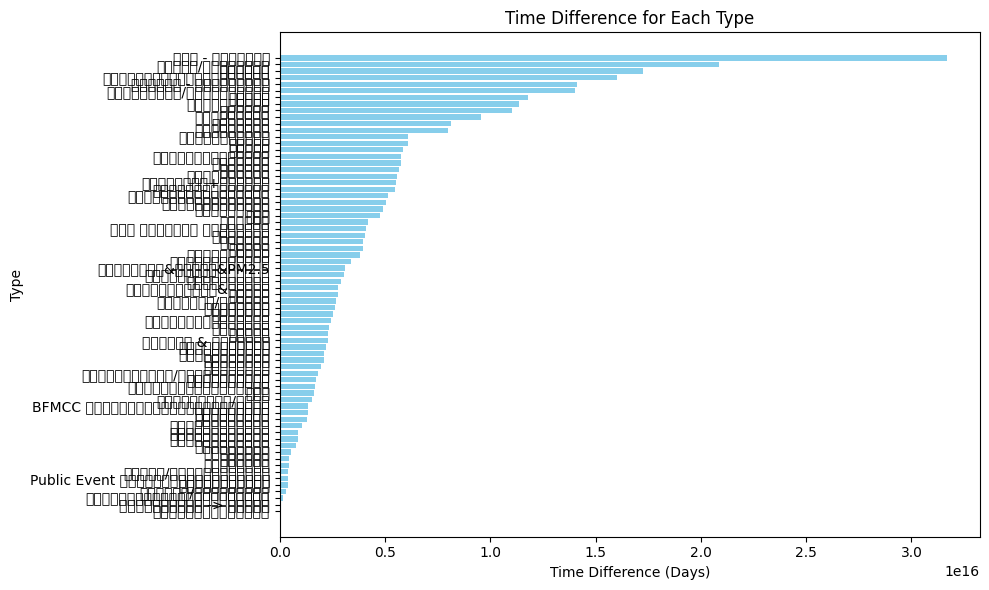

In [157]:
plt.figure(figsize=(10, 6))
plt.barh(se['type'], se['time-diff'], color='skyblue')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Type')
plt.title('Time Difference for Each Type')
plt.tight_layout()
